<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>

# Mit eigenen Bildern arbeiten

Bisher waren alle unsere verwendeten Daten bereits von Keras für uns formatiert.

Lass uns erkunden, wie es ist, mit einem realistischerem Datensatz zu arbeiten.


## Die Daten

-----------

#### BITTE BEACHTE: DIESER DATENSATZ IST SEHR GROSS. LADE IHN MITHILFE DES FOLGENDEN LINKS HERUNTER, ENTPACKE IHN UND KOPIERE IHN IN DAS VERZEICHNIS *DATA* IM BASISVERZEICHNIS DES KURSES!
    
DOWNLOAD-LINK:
    
    https://drive.google.com/file/d/1U6RtBhML-Lj0w2suve0UhQmwcF5pfJCm/view?usp=sharing

ORIGINALE DATENQUELLE:

    https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

-----------

Der Kaggle-Wettbewerb: [Cats and Dogs](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) enthält 25.000 Bilder von Katzen und Hunden. Wir werden einen Klassifizierer bauen, der mit diesen Bildern arbeitet und versucht, Katzen und Hunde zu unterscheiden!

Die Bilder sind von 0-12499 nummeriert, sowohl Katzen als auch Hunde, wir haben also 12.500 Hundebilder und 12.500 Katzenbilder. Das ist ein großer Datensatz!!


--------
----------
------------


**BEACHTE: Wir werden mit echten Bildern arbeiten, nicht Numpy-Arrays. Dies bedeutet, dass das Lernen, wie man mit einer großen Menge von Bilddateien arbeitet, ein großer Anteil dieses Prozesses sein wird. Es sind zu viele Daten, um sie im Arbeitsspeicher als Numpy-Array zu halten, daher werden wir sie in unser Modell in Schüben einladen müssen.**

### Daten Visualisieren


-------
Lass uns einen genaueren Blick auf die Daten werfen:

In [3]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import cv2
# Technisch gesehen nicht mehr nötig in der neusten Version von Jupyter
%matplotlib inline

In [3]:
cat4 = cv2.imread('../DATA/CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [4]:
type(cat4)

numpy.ndarray

In [5]:
cat4.shape

(375, 500, 3)

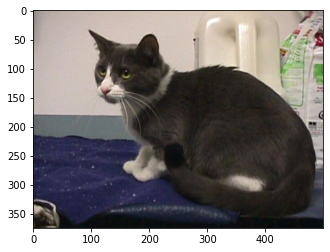

In [6]:
plt.imshow(cat4)

In [9]:
dog2 = cv2.imread('../DATA/CATS_DOGS/train/DOG/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [10]:
dog2.shape

(199, 188, 3)

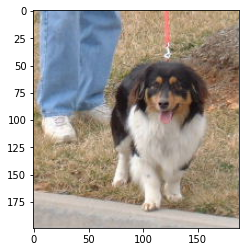

In [11]:
plt.imshow(dog2)

## Die Daten für das Modell vorbereiten

Es sind zu viele Daten für uns, um sie alle auf einmal in den Arbeitsspeicher zu laden. Wir können einige von Keras zur Verfügung gestellte Funktionen zum automatischen Verarbeiten der Dateien verwenden, so das Einlesen in Schüben aus einem Verzeichnis durchführen und auch die Bilder bearbeiten.

### Bildbearbeitung

Es ist im Allgemeinen eine gute Idee, die Bilder mit Rotation, Grössenanpassung und Skalierung zu bearbeiten, damit das Modell robuster wird für andere, nicht in unserem Datensatz enthaltene Bilder. Wir können hierzu den automatisierten **ImageDataGenerator** verwenden. Wirf einen Blick in die Dokumentation für eine vollständige Liste aller Parameter, die du hier verwenden kannst!

In [12]:
from keras.preprocessing.image import ImageDataGenerator

2023-06-08 07:11:55.709608: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 07:11:55.972691: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-08 07:11:56.021948: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-08 07:11:56.021976: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [14]:
image_gen = ImageDataGenerator(rotation_range=30, # Rotiere das Bild um 90 Grad
                               width_shift_range=0.1, # Verschiebe die Bildbreite um maximal 10%
                               height_shift_range=0.1, # Verschiebe die Bildhöhe um maximal 10%
                               rescale=1/255, # Skaliere das Bild durch Normalisierung
                               shear_range=0.2, # Schneide ein Teil des Bildes ab (maximal 20%)
                               zoom_range=0.2, # Vergrössere das Bild um maximal 20%
                               horizontal_flip=True, # Erlaube das Spiegeln an der horizontalen Achse
                               fill_mode='nearest' # Fülle fehlende Pixel mit dem nächsten, ausgefüllten Wert
                              )

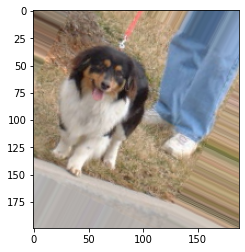

In [15]:
plt.imshow(image_gen.random_transform(dog2))

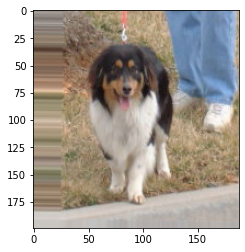

In [16]:
plt.imshow(image_gen.random_transform(dog2))

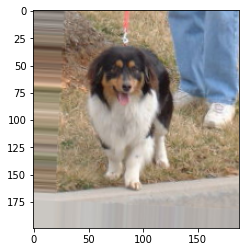

In [17]:
plt.imshow(image_gen.random_transform(dog2))

### Viele manipulierte Bilder aus einem Verzeichnes generieren


Um .flow_from_directory zu verwenden, musst du die Bilder in Unterverzeichnissen vorbereiten. Dies ist eine absolute Vorraussetzung, andernfalls kann die Methode nicht funktionieren. Die Verzeichnisse sollten nur Bilder einer Klasse enthalten, also ein Verzeichnis pro Bildklasse.

Benötigte Struktur:

* Bilddatenordner
    * Klasse 1
        * 0.jpg
        * 1.jpg
        * ...
    * Klasse 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Klasse n

In [18]:
image_gen.flow_from_directory('../DATA/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [19]:
image_gen.flow_from_directory('../DATA/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


### Bildgrößenanpassung

Lasst uns mit Keras die Bildgröße aller Bilder auf 150 mal 150 Pixel setzen, nachdem sie bearbeitet wurden.

In [20]:
# Breite, Höhe, Kanäle
image_shape = (150,150,3)

# Das Modell erzeugen

In [21]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts (Ausfälle) verhindern ein overfitting (Überanpassung) durch das zufällige Ausschalten von Neuronen während des Trainings.
# Hier sagen wir: schalte zufällig 50% aller Neuronen aus.
model.add(Dropout(0.5))

# Letztes Layer (Ebene), wie zuvor ist es binär, 0=Katze , 1=Hund
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2023-06-08 07:12:38.061903: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-08 07:12:38.062196: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-08 07:12:38.062215: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anarki): /proc/driver/nvidia/version does not exist
2023-06-08 07:12:38.063339: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

### Modell trainieren

In [24]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [25]:
test_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [26]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
results = model.fit(train_image_gen,epochs=100,
                    steps_per_epoch=150,
                    validation_data=test_image_gen,
                    validation_steps=12)

Epoch 1/100
150/150 [==============================] - 24s 152ms/step - loss: 0.6976 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.4740
Epoch 2/100
150/150 [==============================] - 24s 158ms/step - loss: 0.6913 - accuracy: 0.5408 - val_loss: 0.6793 - val_accuracy: 0.5729
Epoch 3/100
150/150 [==============================] - 25s 164ms/step - loss: 0.6843 - accuracy: 0.5479 - val_loss: 0.6554 - val_accuracy: 0.6094
Epoch 4/100
150/150 [==============================] - 25s 164ms/step - loss: 0.6736 - accuracy: 0.5917 - val_loss: 0.6491 - val_accuracy: 0.6250
Epoch 5/100
150/150 [==============================] - 25s 164ms/step - loss: 0.6691 - accuracy: 0.6087 - val_loss: 0.6154 - val_accuracy: 0.6510
Epoch 6/100
150/150 [==============================] - 25s 164ms/step - loss: 0.6661 - accuracy: 0.6025 - val_loss: 0.6681 - val_accuracy: 0.5729
Epoch 7/100
150/150 [==============================] - 25s 164ms/step - loss: 0.6554 - accuracy: 0.6200 - val_loss: 0.6176 -

Epoch 57/100
150/150 [==============================] - 24s 161ms/step - loss: 0.4437 - accuracy: 0.7996 - val_loss: 0.4662 - val_accuracy: 0.7812
Epoch 58/100
150/150 [==============================] - 24s 159ms/step - loss: 0.4475 - accuracy: 0.7917 - val_loss: 0.4465 - val_accuracy: 0.7917
Epoch 59/100
150/150 [==============================] - 25s 164ms/step - loss: 0.4412 - accuracy: 0.7933 - val_loss: 0.3806 - val_accuracy: 0.8385
Epoch 60/100
150/150 [==============================] - 24s 161ms/step - loss: 0.4453 - accuracy: 0.8079 - val_loss: 0.4337 - val_accuracy: 0.7865
Epoch 61/100
150/150 [==============================] - 24s 163ms/step - loss: 0.4506 - accuracy: 0.7979 - val_loss: 0.4162 - val_accuracy: 0.7865
Epoch 62/100
150/150 [==============================] - 24s 161ms/step - loss: 0.4364 - accuracy: 0.8096 - val_loss: 0.4191 - val_accuracy: 0.8281
Epoch 63/100
150/150 [==============================] - 24s 161ms/step - loss: 0.4301 - accuracy: 0.8097 - val_loss: 0

In [ ]:
# model.save('cat_dog2.h5')

# Modell evaluieren

In [30]:
results.history['accuracy']

[0.5012500286102295,
 0.5408333539962769,
 0.5479166507720947,
 0.5916666388511658,
 0.6087499856948853,
 0.6025000214576721,
 0.6200000047683716,
 0.6382266879081726,
 0.6299999952316284,
 0.6391666531562805,
 0.6495833396911621,
 0.6424999833106995,
 0.6708333492279053,
 0.684166669845581,
 0.7087500095367432,
 0.7054166793823242,
 0.7049999833106995,
 0.6987500190734863,
 0.706250011920929,
 0.7425000071525574,
 0.7279166579246521,
 0.7087500095367432,
 0.7504166960716248,
 0.7295833230018616,
 0.7358333468437195,
 0.7329166531562805,
 0.7445833086967468,
 0.7462499737739563,
 0.7562500238418579,
 0.7566666603088379,
 0.7662066221237183,
 0.7745833396911621,
 0.7720833420753479,
 0.7608333230018616,
 0.7787500023841858,
 0.7662500143051147,
 0.7604166865348816,
 0.7620833516120911,
 0.7762500047683716,
 0.7712500095367432,
 0.7808333039283752,
 0.7720833420753479,
 0.7729166746139526,
 0.7837499976158142,
 0.7908333539962769,
 0.7895833253860474,
 0.7724999785423279,
 0.782916665077

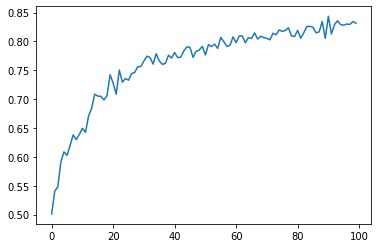

In [31]:
plt.plot(results.history['accuracy'])

In [ ]:
# model.save('cat_dog_100epochs.h5')

# Neue Bilder beurteilen

In [32]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [36]:
import numpy as np
#from keras.preprocessing import image
from keras import utils

dog_file = '../DATA/CATS_DOGS/train/DOG/2.jpg'

dog_img = utils.load_img(dog_file, target_size=(150, 150))

dog_img = utils.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [37]:
prediction_prob = model.predict(dog_img)

1/1 [==============================] - 0s 96ms/step


In [38]:
# Beurteilung ausgeben
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.9169108]] 


# Gut gemacht!